# My Open Data Story

# Analyze open data sets with pandas DataFrames

In this notebook, I'll perform analysis on Open Data. Step by step, I'll load, clean, and explore the data with pandas DataFrames.

The data sets for this report are from the World Development Indicators (WDI) data set. The WDI data set is a statistical benchmark that helps measure the progress of human development. The WDI data set draws on data from the World Bank and more than 30 partners. We'll look at seven key development variables, sorted by country and year.

## Chapters of the story book

1. Access data from the Watson Studio home page.
1. Merge multiple data sets in pandas DataFrames.
1. Structure data for analysis.
1. Generate summary statistics.
1. Create charts with custom formatting.
1. Show relationships between all variables.

## Table of contents
The main parts of this report are:
1. [Load data into DataFrames](#load)
    1. [Load the first data set](#first)
    1. [Load another data set](#loadsecond)
    1. [Join the DataFrames](#joindataframes)
    1. [Add more data](#loadmore)
    1. [Create a MultiIndex](#multiindex)
1. [Check the data](#check)
1. [Analyze the data](#analysis)
    1. [Create scatter plots with matplotlib](#matplotlib)
    1. [Create a scatter plot matrix](#matrix)

<a id="load"></a>
## 1. Load data into DataFrames

We'll load different demographic datasets one by one and put them into the code to create pandas DataFrames. We'll load data into multiple DataFrames and then merge the DataFrames and create a MultiIndex to structure the data for analysis.

<a id="first"></a>
### A. Load the first data set
​
The first data set that I have loaded is life expectancy data.

In [12]:
import pandas as pd
import numpy as np

# life expectancy at birth in years
life = pd.read_csv("https://dataplatform.ibm.com/exchange-api/v1/entries/f15be429051727172e0d0c226e2ce895/data?accessKey=17f21d9f149276e27750a0c610bcb121	",usecols=['Country or Area','Year','Value'])
life.columns = ['country','year','life']
life[0:5]

,country,year,life
0,Afghanistan,2012,60.509122
1,Afghanistan,2011,60.065366
2,Afghanistan,2010,59.600098
3,Afghanistan,2009,59.112341
4,Afghanistan,2008,58.607098


<a id="loadsecond"></a>
### B. Load another data set

The life expectancy figures are more meaningful if we combine them with other data sets.
This loads three columns of the data and prints the number of countries in each data set:

In [26]:
# population
population = pd.read_csv("https://dataplatform.ibm.com/exchange-api/v1/entries/889ca053a19986a4445839358a91963e/data?accessKey=17f21d9f149276e27750a0c610c11171	",usecols=['Country or Area', 'Year','Value'])
population.columns = ['country', 'year','population']

print("No. of countries in life:", np.size(np.unique(life['country'])))
print("No. of countries in population:", np.size(np.unique(population['country'])))

No. of countries in life: 246
No. of countries in population: 245


<a id="joindataframes"></a>
### C. Join DataFrames

As we can observe, the two data sets don't fit together perfectly: one contains more countries than the other. When we join two DataFrames, it's common to introduce nulls or NaNs (a value that's not a number when a number is expected) into the resulting DataFrame. 

Use the pandas `merge` function to make the data fit together. In the following cell, the `how='outer'` option specifies to keep the data from the `life` and `population` columns. The `on=['country','year']` option specifies which columns to merge on. 

In [14]:
df = pd.merge(life, population, how='outer', sort=True, on=['country','year'])
df[400:405]

,country,year,life,population
400,Andorra,1978,NaN,33746.0
401,Andorra,1979,NaN,34819.0
402,Andorra,1980,NaN,36063.0
403,Andorra,1981,NaN,37502.0
404,Andorra,1982,NaN,39112.0


<a id="loadmore"></a>
### D. Add more data 

I added more data about development to the DataFrame. For each data set, I include the country and year columns, plus a column that contains the key development variable for that data set. For the employment data set, I derived a column from three original columns.

In [15]:
# Population below national poverty line, total, percentage
poverty = pd.read_csv("https://dataplatform.ibm.com/exchange-api/v1/entries/3a42de810e682d5a83e76fda9fea2bbe/data?accessKey=17f21d9f149276e27750a0c610d4b9c3	",usecols=['Country or Area', 'Year','Value'])
poverty.columns = ['country', 'year','poverty']
df = pd.merge(df, poverty, how='outer', sort=True, on=['country','year'])

# Primary school completion rate % of relevant age group by country
school = pd.read_csv("https://dataplatform.ibm.com/exchange-api/v1/entries/97fc6c420265012ae9b5e9439b9ee293/data?accessKey=30619974547c179a899ffb94d69acb3f	",usecols=['Country or Area', 'Year','Value'])
school.columns = ['country', 'year','school']
df = pd.merge(df, school, how='outer', sort=True, on=['country','year'])

# Total employment, by economic activity (Thousands)
employmentin = pd.read_csv("https://dataplatform.ibm.com/exchange-api/v1/entries/21c789ae4cfadf52f1bb14b5d4a0b99c/data?accessKey=3e2831d419e3d461b31cdb9338a1abc1	",usecols=['Country or Area', 'Year','Value','Sex','Subclassification'])
employment = employmentin.loc[(employmentin.Sex=='Total men and women')&
                              (employmentin.Subclassification=='Total.')]
employment = employment.drop('Sex', 1)
employment = employment.drop('Subclassification', 1)
employment.columns = ['country', 'year','employment']
df = pd.merge(df, employment, how='outer', sort=True, on=['country','year'])

# Births attended by skilled health staff (% of total) by country
births = pd.read_csv("https://dataplatform.ibm.com/exchange-api/v1/entries/87160cc8374805cb3b07dff4b4f9223e/data?accessKey=17f21d9f149276e27750a0c610d6ae95	",usecols=['Country or Area', 'Year','Value'])
births.columns = ['country', 'year','births']
df = pd.merge(df, births, how='outer', sort=True, on=['country','year'])

# Measles immunization % children 12-23 months by country
measles = pd.read_csv("https://dataplatform.ibm.com/exchange-api/v1/entries/752e36ea889eca360e989baa785c2a5e/data?accessKey=3e2831d419e3d461b31cdb9338a2c3e0	",usecols=['Country or Area', 'Year','Value'])
measles.columns = ['country', 'year','measles']
df = pd.merge(df, measles, how='outer', sort=True, on=['country','year'])

df[0:50]

,country,year,life,population,poverty,school,employment,births,measles
0,2,Derived using linearly extrapolated data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,National estimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Derived using linearly interpolated data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,UNESCO Institute for Statistics (UIS) estimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Derived using extrapolated data assuming the s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Derived using interpolated data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Derived using extrapolated data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Derived using linearly extrapolated data assum...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Derived using preliminary data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,1960,NaN,8774440.0,NaN,NaN,NaN,NaN,NaN


The resulting table looks strange because the first 40 rows contain incorrect values, such as numbers in the `country` column and text in the `year` column. Run the following cell to delete the first 40 rows from the DataFrame: 

In [16]:
df=df.drop(df.index[0:8])

df[0:25000]

,country,year,life,population,poverty,school,employment,births,measles
8,8,Derived using preliminary data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,1960,NaN,8774440.0,NaN,NaN,NaN,NaN,NaN
10,Afghanistan,1961,NaN,8953544.0,NaN,NaN,NaN,NaN,NaN
11,Afghanistan,1962,NaN,9141783.0,NaN,NaN,NaN,NaN,NaN
12,Afghanistan,1963,NaN,9339507.0,NaN,NaN,NaN,NaN,NaN
13,Afghanistan,1964,NaN,9547131.0,NaN,NaN,NaN,NaN,NaN
14,Afghanistan,1965,NaN,9765015.0,NaN,NaN,NaN,NaN,NaN
15,Afghanistan,1966,NaN,9990125.0,NaN,NaN,NaN,NaN,NaN
16,Afghanistan,1967,NaN,10221902.0,NaN,NaN,NaN,NaN,NaN
17,Afghanistan,1968,NaN,10465770.0,NaN,NaN,NaN,NaN,NaN


<a id="multiindex"></a>
### E. Create a MultiIndex

I'll now structure the data for analysis by creating a pandas MultiIndex. A MultiIndex is a hierarchical index that groups the data so that we can easily summarize it.
For example, by grouping by country and then by year, we can plot the average value per country for all years instead of plotting a value for every country for every year.

I run this cell to create a MultiIndex on the country and the year:

In [21]:
df2 = df.set_index(['country','year'])
df2[0:100]

life  population  poverty  \
country     year                                                             
8           Derived using preliminary data        NaN         NaN      NaN   
Afghanistan 1960                                  NaN   8774440.0      NaN   
            1961                                  NaN   8953544.0      NaN   
            1962                                  NaN   9141783.0      NaN   
            1963                                  NaN   9339507.0      NaN   
            1964                                  NaN   9547131.0      NaN   
            1965                                  NaN   9765015.0      NaN   
            1966                                  NaN   9990125.0      NaN   
            1967                                  NaN  10221902.0      NaN   
            1968                                  NaN  10465770.0      NaN   
            1969                                  NaN  10729191.0      NaN   
            1970                                  NaN  11015621.0      NaN   
            1971                                  NaN  11323446.0      NaN   
            1972                                  NaN  11644377.0      NaN   
            1973                                  NaN  11966352.0      NaN   
            1974                                  NaN  12273589.0      NaN   
            1975                                  NaN  12551790.0      NaN   
            1976                                  NaN  12806810.0      NaN   
            1977                                  NaN  13034460.0      NaN   
            1978                                  NaN  13199597.0      NaN   
            1979                                  NaN  13257128.0      NaN   
            1980                                  NaN  13180431.0      NaN   
            1981                                  NaN  12963788.0      NaN   
            1982                                  NaN  12634494.0      NaN   
            1983                                  NaN  12241928.0      NaN   
            1984                                  NaN  11854205.0      NaN   
            1985                                  NaN  11528977.0      NaN   
            1986                                  NaN  11262439.0      NaN   
            1987                                  NaN  11063107.0      NaN   
            1988                                  NaN  11013345.0      NaN   
...                                               ...         ...      ...   
            1975                            38.970268         NaN      NaN   
            1976                            39.410732         NaN      NaN   
            1977                            39.847707         NaN      NaN   
            1978                            40.290683         NaN      NaN   
            1979                            40.748171         NaN      NaN   
            1980                            41.233659         NaN      NaN   
            1981                            41.760634         NaN      NaN   
            1982                            42.335610         NaN      NaN   
            1983                            42.963049         NaN      NaN   
            1984                            43.644488         NaN      NaN   
            1985                            44.379902         NaN      NaN   
            1986                            45.168805         NaN      NaN   
            1987                            45.997220         NaN      NaN   
            1988                            46.850146         NaN      NaN   
            1989                            47.711585         NaN      NaN   
            1990                            48.567049         NaN      NaN   
            1991                            49.404561         NaN      NaN   
            1992                            50.213122         NaN      NaN   
            1993                            50.985244         NaN      

As we can see that for the 1980s, the only data for Afghanistan is about measles immunizations. 

We can add more WDI data sets from the Watson Studio home page to this DataFrame. Not all WDI data is properly formatted. We might need to clean the data before adding it. We can reuse the code samples that we just ran.

<a id="check"></a>
## 2. Check the data 
We can check the data with the `describe()` method</a>, which calculates basic summary statistics for each of the columns in the DataFrame (except the country and year columns). 

Run the following cell to show the number of values (count), the mean, the standard deviation (std), the minimum value, three percentiles, and the maximum value for the columns: 

In [22]:
df2.describe()

,life,population,poverty,school,employment,births,measles
count,11969.000000,1.331900e+04,651.000000,5078.000000,2909.000000,1523.000000,6944.000000
mean,63.156417,1.390934e+08,30.763209,78.018509,14337.147966,83.944882,76.452661
std,11.290103,5.405577e+08,17.349350,25.675860,57236.797036,23.885349,22.153693
min,19.504927,4.279000e+03,1.700000,1.522030,0.663000,5.000000,1.000000
25%,54.884268,8.664765e+05,17.245109,60.831905,954.300000,73.650000,65.000000
50%,66.171191,5.434294e+06,26.900000,88.120480,3256.500000,98.000000,84.000000
75%,71.691415,2.592881e+07,43.700000,97.417360,9463.000000,99.700000,94.000000
max,83.480488,7.124544e+09,96.000000,193.263340,737400.000000,100.000000,99.000000


<a id="analysis"></a>
## 3. Analyze the data
Now we have collected enough sample data to work with, we can find the correlation between different variables. I'll now create scatter plots that each compare two variables. 

<a id="matplotlib"></a>
### A. Create scatter plots with matplotlib

Run the following cell to create two scatter plots that relate the values of population and amount of schooling to life expectancy. Here, I use `matplotlib` library commands to create charts with custom font, figure size, and colors. 

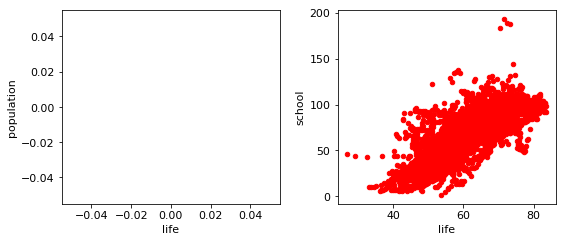

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size']=11
plt.rcParams['figure.figsize']=[8.0, 3.5]
fig, axes=plt.subplots(nrows=1, ncols=2)
df2.plot(kind='scatter', x='life', y='population', ax=axes[0], color='Red');
df2.plot(kind='scatter', x='life', y='school', ax=axes[1], color='Red');
plt.tight_layout()

**Inference**: The chart on the left shows that increased life expectancy leads to higher population. Each dot represents a value for one country for one year.

The chart on the right shows that the life expectancy increases with the percentage of school completion. Each dot represents the average value for one country for all years that have data. The percentage goes up to 200% instead of 100%. This might indicate a problem with the data. We can remove the outliers and keep only the values less than 100% with a command like: `df2[df2.school>100]=float('NaN')`. Even better, we can check where these values in the original data came from. In this case, however, the values are correct because of the way the school completion data was calculated. Percentages higher than 100 indicate that older people are finishing primary school.

<a id="matrix"></a>
### B. Create a scatter plot matrix

We can create charts that show the relationships between all variables with a scatter plot matrix. Each dot represents the average value for one country for all years that have data. 

I run the following cell to create scatter plots and histograms from the DataFrame with the `scatter_matrix()` method. Because the data does not cover the same years, group the data by country (with some loss of data). Many variables are percentages, so convert the employment figures to percentages as well. We can optionally drop the `population` column, because we don't need it anymore. 

/home/rupal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  # This is added back by InteractiveShellApp.init_path()


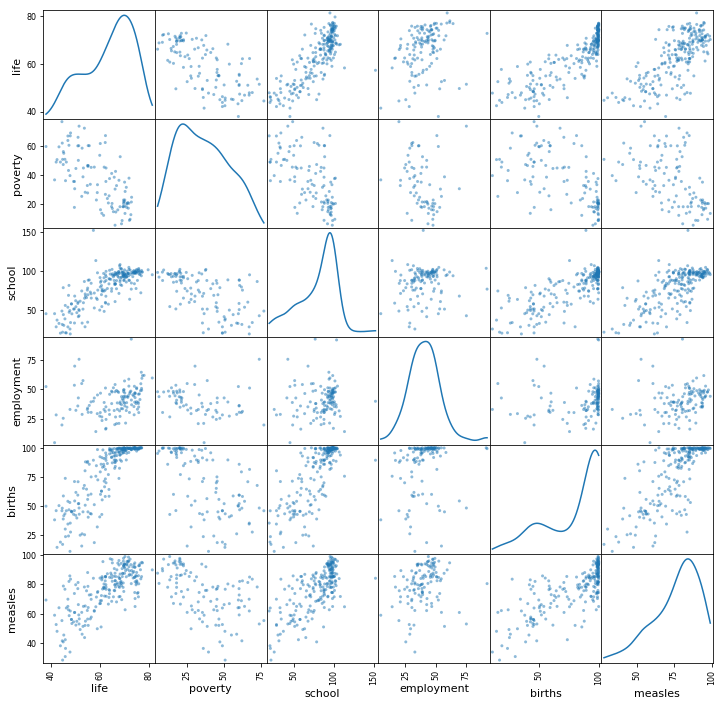

In [25]:
from pandas.tools.plotting import scatter_matrix

# group by country
grouped = df2.groupby(level=0)
dfgroup = grouped.mean()

# employment in % of total population
dfgroup['employment']=(dfgroup['employment']*1000.)/dfgroup['population']*100
dfgroup=dfgroup.drop('population',1)

scatter_matrix(dfgroup,figsize=(12, 12), diagonal='kde');

We can see that the data is now in a pretty good state. There are no large outliers. We start to see some relationships: life expectancy increases with schooling, employment, safe births, and measles vaccination.